In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')

print('=== CEK MISSING VALUE ===')
data.isnull().sum()

=== CEK MISSING VALUE ===


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

=== MISSING VALUE ===

Tidak ada missing value, maka semua data dipertahankan

In [2]:
print('=== CEK DUPLICATE VALUE ===')
print('Total data duplikat: ', data.duplicated().sum())

=== CEK DUPLICATE VALUE ===
Total data duplikat:  723


=== DUPLICATE VALUE ===
1. Terlalu banyak data duplikat yang apabila bila dihapus akan sangat berpengaruh pada dataset. 
2. Data akan dipertahankan untuk kebutuhan analisis dan karena dalam dunia medis banyak kondisi pasien yang sama.

=== CEK OUTLIER KOLOM "AGE" ===


<Axes: ylabel='age'>

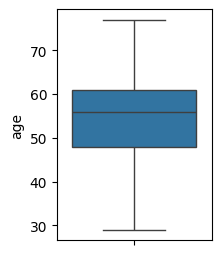

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print('=== CEK OUTLIER KOLOM "AGE" ===')
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(data['age'])

=== OUTLIER ===
1. Tidak ada outlier, semua umur pada rentang normal.
2. Kolom lain tidak dicek outlier karna sisanya adalah kondisi medis yang valid dan merupakan data penting

In [4]:
from sklearn.preprocessing import StandardScaler

print('=== STANDARISASI KOLOM NUMERIK ===')
scaler = StandardScaler()
numerik_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
x1 = data[numerik_column]
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=numerik_column)
x1.head()

=== STANDARISASI KOLOM NUMERIK ===


,age,trestbps,chol,thalach,oldpeak
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,0.834359,0.364875,0.930822,-1.874977,0.705408


=== STANDARISAI KOLOM NUMERIK ===

Standarisasi menggunakan metode Z-Score Scalling

=== ENCODING KOLOM KATEGORIKAL ===

Tidak dilakukan encoding karena kolom kategorikal sudah dalam format numerik yang sesuai 
1. sex: 0=female, 1=male✅
2. cp: 0-3 (chest pain type, ordinal)✅
3. fbs: 0/1 (fasting blood sugar)✅
4. restecg: 0-2 (resting ECG results)✅
5. exang: 0/1 (exercise induced angina)✅
6. slope: 0-2 (slope of ST segment)✅
7. ca: 0-4 (number of major vessels)✅
8. thal: 0-3 (thalassemia)✅

In [5]:
print('=== FEATURE ENGINEERING ===')

# High Risk
data['high_risk'] = (
    ((data['age'] > 55).astype(int)) &
    ((data['trestbps'] >= 140).astype(int) | (data['chol'] >= 240).astype(int)) &
    (data['exang'] == 1)).astype(int)
data.head()

=== FEATURE ENGINEERING ===


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0


=== FEATURE ENGINEERING ===

**High Risk: Identifikasi pasien dengan faktor resiko cardiovaskular yang tinggi**

✅Usia > 55 tahun
1. Risiko penyakit jantung meningkat signifikan setelah usia ini

✅Tekanan darah tinggi (≥140) atau Kolesterol tinggi (≥240)
1. Minimal salah satu dari dua faktor metabolik ini harus ada
2. Hypertension Stage 1+ atau High Cholesterol

✅Exercise-induced angina (exang = 1)
1. Nyeri dada saat aktivitas fisik
2. Indikator kuat adanya ischemia (kurang oksigen ke jantung)

In [ ]:
from sklearn.model_selection import train_test_split

print('=== SPLITTING DATA ===')
X = data.iloc[:,:-1] 
y = data.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42, stratify=y)
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

**=== SPLITTING DATA ===***

1. Splitting data dengan rasio 80% training dan 20% testing.
2. Stratify: yes untuk mempertahankan proporsi target di train dan test